In [1]:
# %matplotlib qt
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

import time
import copy
import numpy as np
from skimage.filters import gaussian_filter
import cv2

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pylab as pl

from tifffile import imread, imsave
import cPickle as pickle

%reload_ext autoreload
%autoreload 2

from netsurface2d import NetSurf2d
from netsurface2dt import NetSurf2dt
from data3d import Data3d

Populating the interactive namespace from numpy and matplotlib


# Load time-lapse data...

In [2]:
#folder = '/Users/jug/Repositories/GIT/BobSeg/AmyMaddox/'
folder = '/Users/maddox/Jug/Data/'

#filename = folder + 'Reslice_of_298_crop.tif'
filename = folder + 'Reslice_of_nd324_crop_16b.tif'

stack = imread(filename)
print 'Stack shape:',stack.shape

sigma = [0.,3.,3.]
stack_smooth = gaussian_filter(stack,sigma)

Stack shape: (100, 399, 372)


/Users/maddox/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/skimage/filters/_gaussian.py:13: skimage_deprecation: Call to deprecated function ``gaussian_filter``. Use ``skimage.filters.gaussian`` instead.
  multichannel=None):


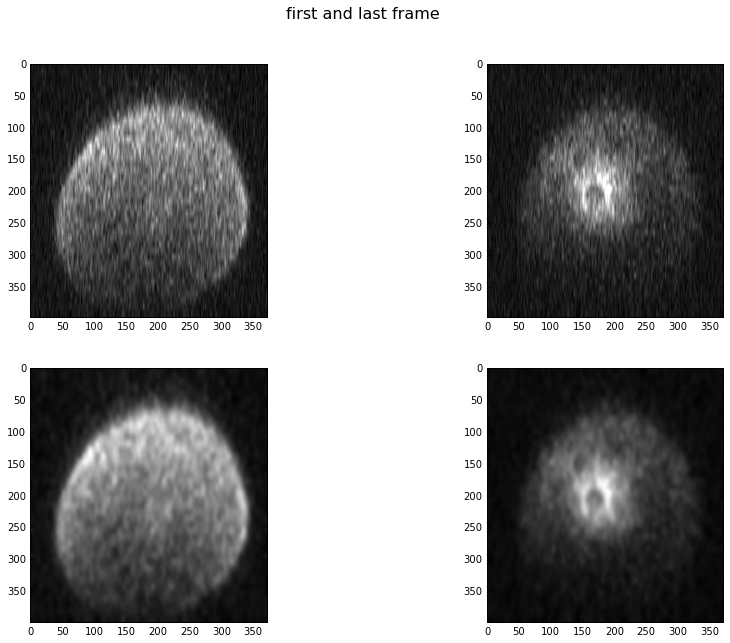

In [3]:
pylab.rcParams['figure.figsize'] = (15, 10)

fig = plt.figure()
fig.suptitle('first and last frame', fontsize=16)
ax = fig.add_subplot(221)
ax.imshow(stack[0], plt.get_cmap('gray'))
ax = fig.add_subplot(222)
ax.imshow(stack[-1], plt.get_cmap('gray'))
ax = fig.add_subplot(223)
ax.imshow(stack_smooth[0], plt.get_cmap('gray'))
ax = fig.add_subplot(224)
ax.imshow(stack_smooth[-1], plt.get_cmap('gray'))

In [4]:
max_rs = (stack[0].shape[1] / 2,
          stack[0].shape[1] / 2)

min_rs = (5,5)
print min_rs, max_rs

(5, 5) (186, 186)


# Adding ring

In [5]:
data = Data3d( stack_smooth, pixelsize=(1.,1.), silent=False )
data.set_seg_params(num_columns=72,K=150,max_delta_k=1)
objects = []

In [6]:
ring = data.init_object("ring")
objects.append(ring)

In [7]:
cx = stack.shape[2] / 2
cy = stack.shape[1] / 2
data.add_object_at( ring, min_rs, max_rs, frame=0, seed=(cx,cy), segment_it=True )
data.track(ring, seed_frame=0, target_frames=range(0,len(data.images)), recenter_iterations=2)

Added appearance for "ring" in frame 0 with seed coordinates [ 186.  199.]
      Optimum energy:  26.4999020689
      Nodes in/out:  6578 4222
      Area:  40055.5
Added appearance for "ring" in frame 0 with seed coordinates [ 186.  199.]
      Optimum energy:  26.4999020689
      Nodes in/out:  6578 4222
      Area:  40055.5
    Updated center to [184 197]
    Updated center to [184 197]
Added appearance for "ring" in frame 1 with seed coordinates [ 184.  197.]
      Optimum energy:  25.4418830603
      Nodes in/out:  6486 4314
      Area:  38979.0
    Updated center to [183 196]
    Updated center to [183 196]
Added appearance for "ring" in frame 2 with seed coordinates [ 183.  196.]
      Optimum energy:  28.5048755432
      Nodes in/out:  5975 4825
      Area:  33292.5
    Updated center to [183 191]
    Updated center to [183 191]
Added appearance for "ring" in frame 3 with seed coordinates [ 183.  191.]
      Optimum energy:  26.9552645844
      Nodes in/out:  4440 6360
      Are

In [8]:
data.segment2dt( ring, max_radial_delta=3 )

Results for frame 0:
      Optimum energy:  2242.40723354
      Area:  23660.0
Results for frame 1:
      Optimum energy:  2242.40723354
      Area:  22712.0
Results for frame 2:
      Optimum energy:  2242.40723354
      Area:  22744.5
Results for frame 3:
      Optimum energy:  2242.40723354
      Area:  21974.5
Results for frame 4:
      Optimum energy:  2242.40723354
      Area:  21439.5
Results for frame 5:
      Optimum energy:  2242.40723354
      Area:  20727.0
Results for frame 6:
      Optimum energy:  2242.40723354
      Area:  20590.0
Results for frame 7:
      Optimum energy:  2242.40723354
      Area:  19762.0
Results for frame 8:
      Optimum energy:  2242.40723354
      Area:  18861.5
Results for frame 9:
      Optimum energy:  2242.40723354
      Area:  17199.0
Results for frame 10:
      Optimum energy:  2242.40723354
      Area:  15664.5
Results for frame 11:
      Optimum energy:  2242.40723354
      Area:  15564.0
Results for frame 12:
      Optimum energy:  2242.

# Visualisation stuff 

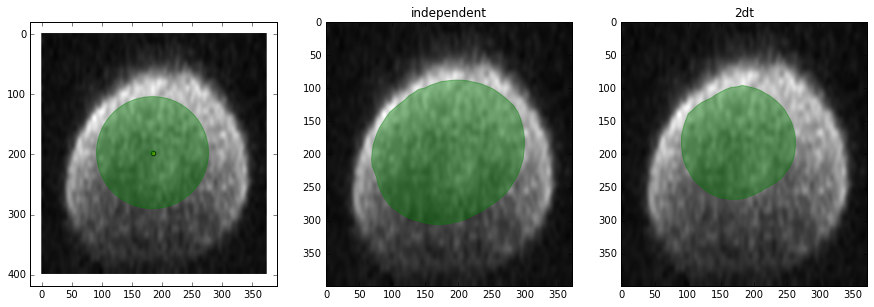

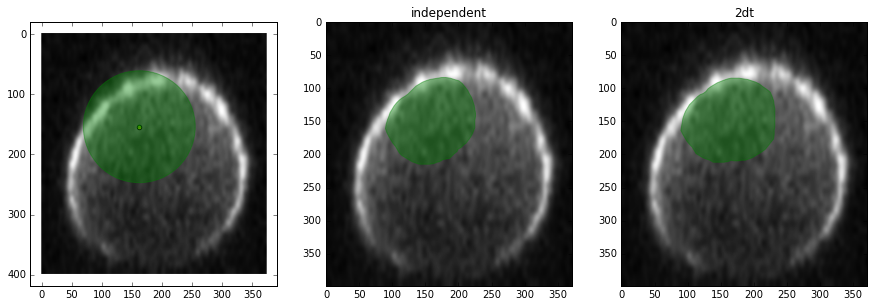

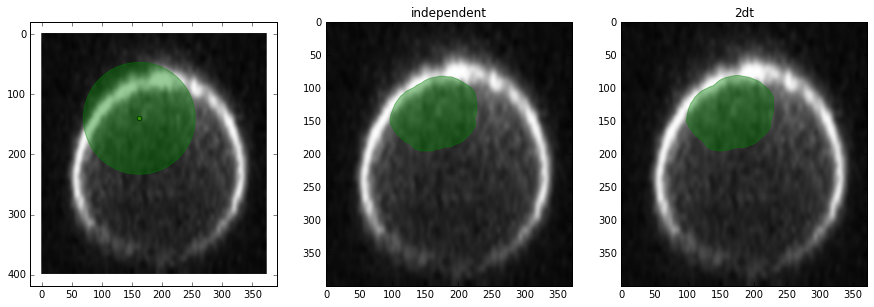

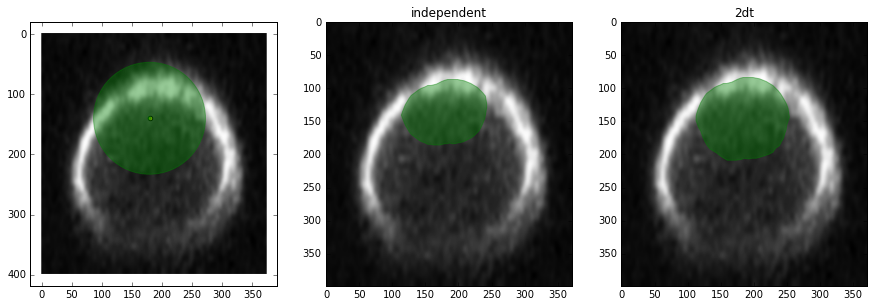

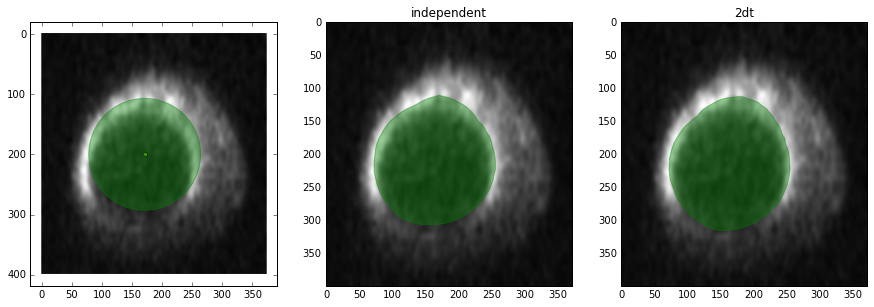

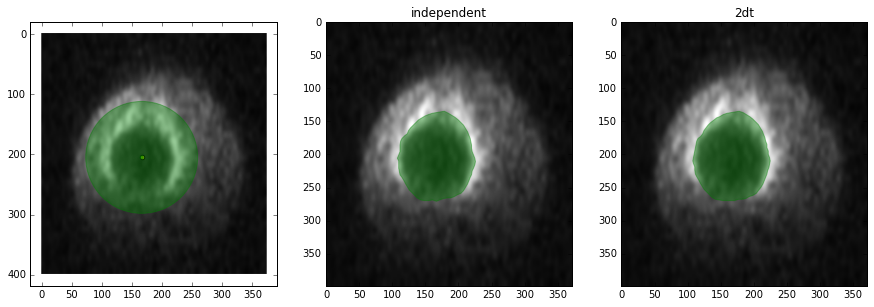

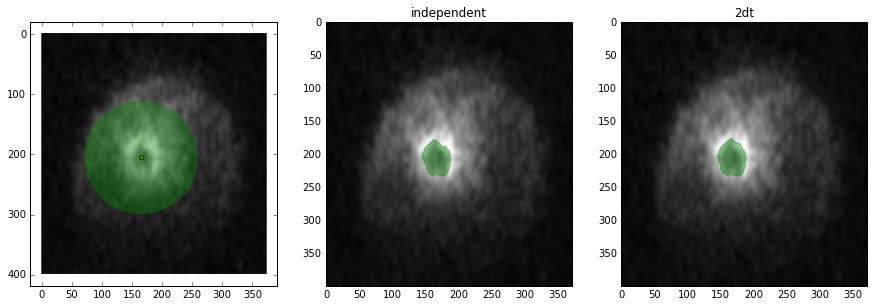

In [9]:
pylab.rcParams['figure.figsize'] = (15, 7)
for frame in range(1,len(data.images),len(data.images)/6):
    fig = plt.figure()
    ax = plt.subplot(131)
    data.plot_minmax( frame, ax )
    ax = plt.subplot(132)
    ax.set_title('independent')
    data.plot_result( frame, ax )    
    ax = plt.subplot(133)
    ax.set_title('2dt')
    data.plot_2dt_result( frame, ax )

In [10]:
spiral = np.zeros( (len(data.object_seedpoints[0]), 3) )
xs = np.zeros( len(data.object_seedpoints[0]) )
ys = np.zeros( len(data.object_seedpoints[0]) )

In [11]:
# read the center seeds he found for frames
for i in range(len(data.object_seedpoints[0])):
    xs[i] = data.object_seedpoints[0][i][0]    
    ys[i] = data.object_seedpoints[0][i][1]

In [12]:
# get k values over time
kovert = data.get_k_over_time(ring)[:,:60]
print kovert.shape

(72, 55)


In [13]:
kovert_zeromean = kovert / np.mean(kovert,axis=0)

kovert_zeromean2 = kovert_zeromean.transpose() / np.mean(kovert_zeromean,axis=1)
kovert_zeromean2 = kovert_zeromean2.transpose()

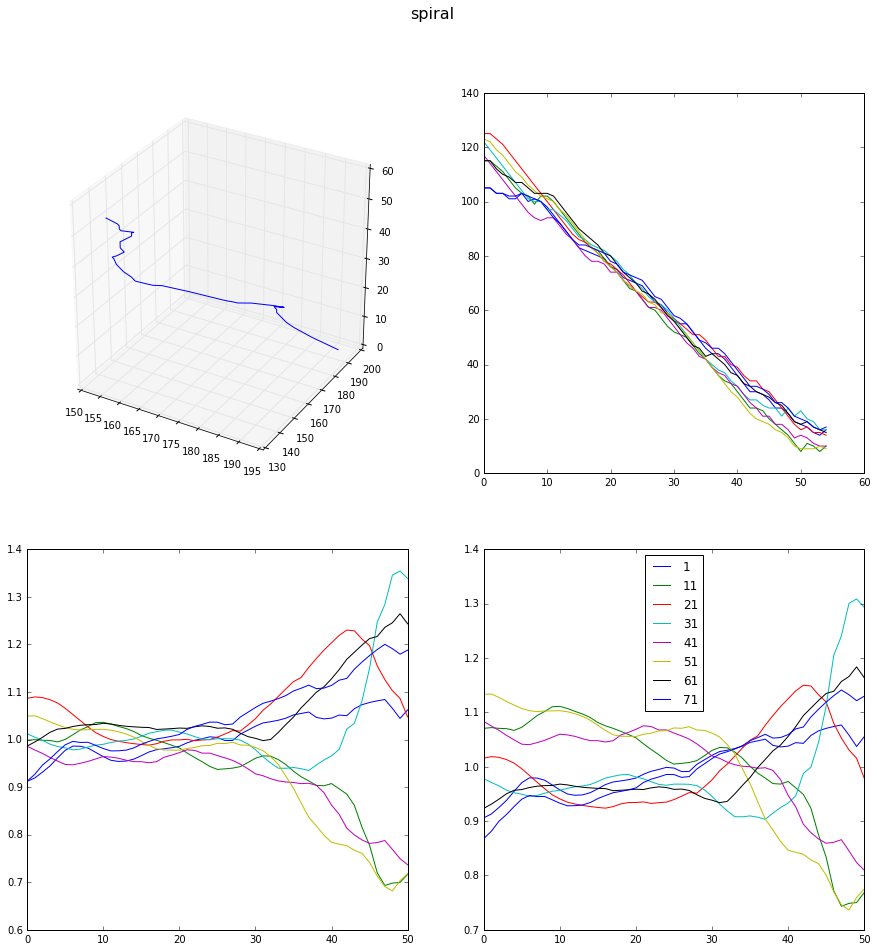

In [14]:
pylab.rcParams['figure.figsize'] = (15, 15)

fig = plt.figure(1)
fig.suptitle('spiral', fontsize=16)

ax = fig.add_subplot(221, projection='3d')
muh = ax.plot(xs,ys,range(len(xs)))

ax = fig.add_subplot(222)
muh = ax.plot(range(kovert.shape[1]),kovert[0::10].transpose())

ax = fig.add_subplot(223)
for i in range(1,len(kovert),10):
    muh = ax.plot(np.convolve(kovert_zeromean[i].transpose(), np.ones((5,))/5, mode='valid'))

ax = fig.add_subplot(224)
for i in range(1,len(kovert),10):
    muh = ax.plot(np.convolve(kovert_zeromean2[i].transpose(), np.ones((5,))/5, mode='valid'),
                  label=str(i));
plt.legend(loc=0)

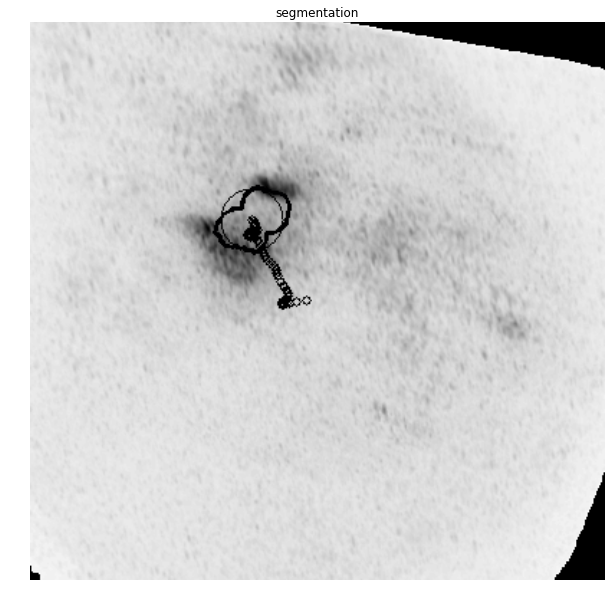

In [15]:
frames = data.draw_segmentation(stack, folder=None, inline=True)

In [17]:
for f in range(len(frames)):
    imsave(folder+'movie_export/frame%02d.tif'%(f), frames[f])